In [204]:
%matplotlib inline
# Dependencies and Setup
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city = pd.read_csv(city_data_to_load)
ride = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
city_ride = pd.merge(city, ride, on = 'city', how = 'outer')

# Display the data table for preview
city_ride.head(10)

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850
5,Richardfort,38,Urban,2018-04-21 03:44:04,9.54,3698147103219
6,Richardfort,38,Urban,2018-02-03 00:14:26,29.04,4982665519010
7,Richardfort,38,Urban,2018-02-08 15:50:12,16.55,2270463070874
8,Richardfort,38,Urban,2018-04-03 15:07:34,40.77,9496210735824
9,Richardfort,38,Urban,2018-02-19 14:09:20,27.11,8690324801449


In [2]:
# Gets the count per city grouped by type and each city.
driver_count_city = pd.DataFrame(city_ride.groupby(['type','city'])['driver_count'].mean())
driver_count_city

driver_count
type     city                              
Rural    Bradshawfurt                     7
         Garzaport                        7
         Harringtonfort                   4
         Jessicaport                      1
         Lake Jamie                       4
         Lake Latoyabury                  2
         Michaelberg                      6
         New Ryantown                     2
         Newtonview                       1
         North Holly                      8
         North Jaime                      1
         Penaborough                      6
         Randallchester                   9
         South Jennifer                   7
         South Marychester                1
         South Saramouth                  7
         Taylorhaven                      1
         West Heather                     4
Suburban Barronchester                   11
         Bethanyland                     22
         Brandonfort                     10
         Colemanland                     23
         Davidfurt                       23
         East Aaronbury                   7
         East Danielview                 22
         East Kentstad                   20
         East Marymouth                   5
         Grayville                        2
         Josephside                      25
         Lake Ann                         3
...                                     ...
Urban    Port Johnbury                    3
         Port Samanthamouth              57
         Raymondhaven                    11
         Reynoldsfurt                    67
         Richardfort                     38
         Roberthaven                     47
         Robertport                      12
         Rodneyfort                      34
         Rogerston                       25
         Royland                         64
         Simpsonburgh                    21
         South Evanton                   11
         South Jack                      46
         South Karenland                  4
         South Latoya                    10
         South Michelleport              72
         South Phillip                   38
         Valentineton                    45
         West Angela                     48
         West Anthony                    70
         West Christopherberg            32
         West Ericstad                   25
         West Gabriel                    57
         West Heidi                      28
         West Josephberg                 45
         West Patrickchester             25
         West Robert                     39
         West Samuelburgh                73
         Williamsstad                    59
         Williamsview                    46

[120 rows x 1 columns]

## Bubble Plot of Ride Sharing Data

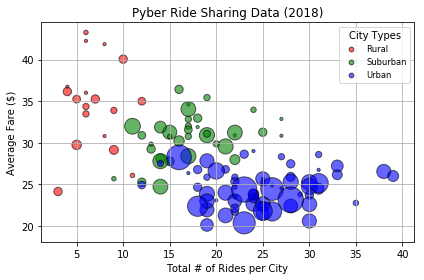

In [203]:
# Obtain the x and y coordinates for each of the three city types

##### RURAL
rural_df = city_ride.loc[city_ride['type'] == 'Rural',:]

avg_rural = rural_df.groupby('city')['fare'].mean()
rides_per_rural = rural_df.groupby('city')['ride_id'].count()

##### SUBURBAN
suburban_df = city_ride.loc[city_ride['type'] == 'Suburban',:]

avg_suburban = suburban_df.groupby('city')['fare'].mean()
rides_per_suburban = suburban_df.groupby('city')['ride_id'].count()

##### URBAN
urban_df = city_ride.loc[city_ride['type'] == 'Urban',:]

avg_urban = urban_df.groupby('city')['fare'].mean()
rides_per_urban = urban_df.groupby('city')['ride_id'].count()


labels = ['Rural', 'Suburban','Urban']


# Build the scatter plots for each city types
plt.scatter(rides_per_rural,avg_rural, s= 10*driver_count_city, c = 'r', edgecolors = 'black',alpha = 0.6)
plt.scatter(rides_per_suburban,avg_suburban, s=10*driver_count_city, c = 'g',edgecolors = 'black', alpha = 0.6)
plt.scatter(rides_per_urban,avg_urban, s= 10*driver_count_city, c = 'b', edgecolors = 'black', alpha = 0.6)
plt.title('Pyber Ride Sharing Data (2018)')
plt.ylabel('Average Fare ($)')
plt.xlabel('Total # of Rides per City')


# Incorporate the other graph properties

# Create a legend
plt.legend(labels = labels, title = 'City Types', fontsize = 'small',markerscale = .25)
# Incorporate a text label regarding circle size

# Save Figure
plt.grid()
plt.tight_layout()
plt.savefig('Pyber_Scatterplot.png')

## Total Fares by City Type

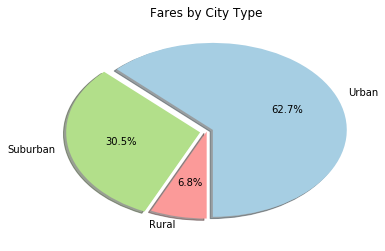

In [206]:
# Calculate Type Percents
total_fare = city_ride['fare'].sum()

rural_fare = round(rural_df['fare'].sum()/total_fare*100,2)
suburban_fare = round(suburban_df['fare'].sum()/total_fare*100,2)
urban_fare = round(urban_df['fare'].sum()/total_fare*100,2)

percentage_by_city = [rural_fare,suburban_fare, urban_fare]


# Build Pie Chart
explode = (0.05, 0.05, 0)
colors = plt.cm.Paired(np.linspace(.01,4,25))
labels2 = ['Urban', 'Suburban','Rural']

plt.pie(sorted(percentage_by_city, reverse = True), labels = labels2, colors = colors, explode = explode, shadow = True, startangle = 270, autopct = '%1.1f%%')
plt.title('Fares by City Type')


# Save Figure
plt.savefig('PyberPie_Fares_by_City.png')

In [ ]:
# Show Figure
plt.show()

## Total Rides by City Type

In [207]:
# Calculate Ride Percents
total_count = city_ride['ride_id'].count()

# rural_rides = round(rural_df['ride_id'].count()/total_count*100,2)
# suburban_rides = round(suburban_df['ride_id'].count()/total_count*100,2)
# urban_rides = round(urban_df['ride_id'].count()/total_count*100,2)


grouped = [rural_df, suburban_df, urban_df]
valueslist = [round(df['ride_id'].count()/total_count*100,2) for df in mylist]

valueslist

explode = (0.05, 0.05, 0)
colors = plt.cm.Paired(np.linspace(.01,4,25))
labels2 = ['Urban', 'Suburban','Rural']

plt.pie(sorted(percentage_by_city, reverse = True), labels = labels2, colors = colors, explode = explode, shadow = True, startangle = 270, autopct = '%1.1f%%')
plt.title('Rides by City Type')


    
    

# Build Pie Chart

# Save Figure


[5.26, 26.32, 68.42]

In [ ]:
# Show Figure
plt.show()

## Total Drivers by City Type

In [ ]:
# Calculate Driver Percents

# Build Pie Charts

# Save Figure


In [ ]:
# Show Figure
plt.show()